In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift
from sklearn.metrics import silhouette_score


In [2]:
data = pd.read_csv("phones_data.csv")
data.head()

,Unnamed: 0,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
0,0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690.0,1529.0,1819.0,36,5.00,8.0,2000.0,10-2020
1,1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
2,2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
3,3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
4,4,Nokia,1.3 1/16GB Charcoal,Android,1047,1999.0,NaN,NaN,10,5.71,16.0,3000.0,4-2020


In [3]:
# Ringkasan statistik untuk data numerikal
summary_stats = data.describe()

# Tampilkan ringkasan statistik
print(summary_stats)

        Unnamed: 0   popularity    best_price  lowest_price  highest_price  \
count  1224.000000  1224.000000   1224.000000    964.000000     964.000000   
mean    611.500000   612.500000   7941.206699   7716.018672    9883.410788   
std     353.482673   353.482673   8891.836260   8560.959059   11514.936818   
min       0.000000     1.000000    214.000000    198.000000     229.000000   
25%     305.750000   306.750000   2599.750000   2399.000000    2887.000000   
50%     611.500000   612.500000   4728.000000   4574.000000    5325.500000   
75%     917.250000   918.250000   9323.000000   9262.250000   12673.750000   
max    1223.000000  1224.000000  56082.000000  49999.000000   69999.000000   

       sellers_amount  screen_size  memory_size  battery_size  
count     1224.000000  1222.000000  1112.000000   1214.000000  
mean        16.743464     5.394378    95.700059   3608.201812  
std         20.597006     1.476991   111.922576   1668.268774  
min          1.000000     1.400000     0.

In [4]:
data.dtypes

Unnamed: 0          int64
brand_name         object
model_name         object
os                 object
popularity          int64
best_price        float64
lowest_price      float64
highest_price     float64
sellers_amount      int64
screen_size       float64
memory_size       float64
battery_size      float64
release_date       object
dtype: object

In [5]:
data.describe()

,Unnamed: 0,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size
count,1224.000000,1224.000000,1224.000000,964.000000,964.000000,1224.000000,1222.000000,1112.000000,1214.000000
mean,611.500000,612.500000,7941.206699,7716.018672,9883.410788,16.743464,5.394378,95.700059,3608.201812
std,353.482673,353.482673,8891.836260,8560.959059,11514.936818,20.597006,1.476991,111.922576,1668.268774
min,0.000000,1.000000,214.000000,198.000000,229.000000,1.000000,1.400000,0.003200,460.000000
25%,305.750000,306.750000,2599.750000,2399.000000,2887.000000,2.000000,5.162500,32.000000,2900.000000
50%,611.500000,612.500000,4728.000000,4574.000000,5325.500000,8.000000,6.000000,64.000000,3687.000000
75%,917.250000,918.250000,9323.000000,9262.250000,12673.750000,26.000000,6.400000,128.000000,4400.000000
max,1223.000000,1224.000000,56082.000000,49999.000000,69999.000000,125.000000,8.100000,1000.000000,18800.000000


In [6]:
data.isnull().sum()

Unnamed: 0          0
brand_name          0
model_name          0
os                197
popularity          0
best_price          0
lowest_price      260
highest_price     260
sellers_amount      0
screen_size         2
memory_size       112
battery_size       10
release_date        0
dtype: int64

In [7]:
# Mengganti nilai yang hilang pada kolom "battery_size" dengan nilai 0
data['battery_size'].fillna(0, inplace=True)

In [8]:
## missing value pada baterry sudah diberikan nilai 0
data.isnull().sum()

Unnamed: 0          0
brand_name          0
model_name          0
os                197
popularity          0
best_price          0
lowest_price      260
highest_price     260
sellers_amount      0
screen_size         2
memory_size       112
battery_size        0
release_date        0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
# Langkah 1: Persiapan Data
data = pd.read_csv('phones_data.csv')


In [11]:
# Langkah 2: Pilih Fitur yang Diperlukan
X = data[['best_price', 'battery_size']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [13]:
# Langkah 3: Mengisi Missing Values
X.fillna(X.median(), inplace=True)


In [14]:
# Langkah 4: Scaling Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

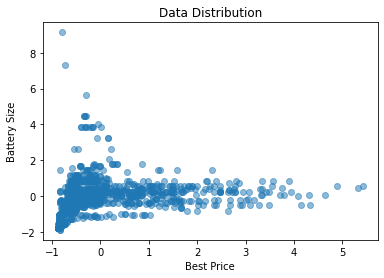

In [15]:
# Langkah 5: Visualisasi Data
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.5)
plt.xlabel('Best Price')
plt.ylabel('Battery Size')
plt.title('Data Distribution')
plt.show()

In [16]:
# A. K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
data['kmeans_cluster'] = kmeans_labels


In [17]:
# B. Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_cluster.fit_predict(X_scaled)
data['agg_cluster'] = agg_labels

In [18]:
# C. DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
data['dbscan_cluster'] = dbscan_labels


In [19]:

# D. Mean Shift Clustering
meanshift = MeanShift()
meanshift_labels = meanshift.fit_predict(X_scaled)
data['meanshift_cluster'] = meanshift_labels

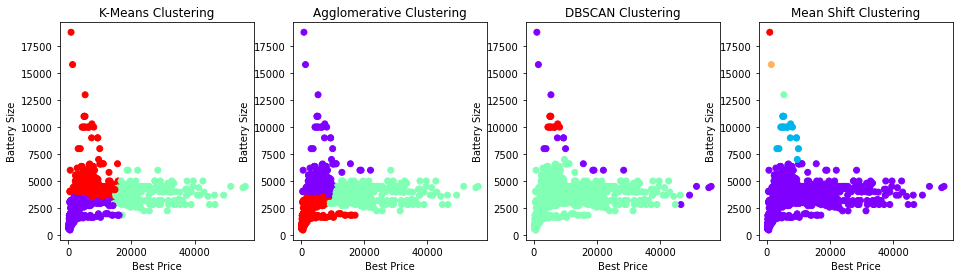

In [20]:
# Langkah 7: Analisis Hasil
plt.figure(figsize=(16, 4))

plt.subplot(1, 4, 1)
plt.scatter(data['best_price'], data['battery_size'], c=data['kmeans_cluster'], cmap='rainbow')
plt.xlabel('Best Price')
plt.ylabel('Battery Size')
plt.title('K-Means Clustering')

plt.subplot(1, 4, 2)
plt.scatter(data['best_price'], data['battery_size'], c=data['agg_cluster'], cmap='rainbow')
plt.xlabel('Best Price')
plt.ylabel('Battery Size')
plt.title('Agglomerative Clustering')

plt.subplot(1, 4, 3)
plt.scatter(data['best_price'], data['battery_size'], c=data['dbscan_cluster'], cmap='rainbow')
plt.xlabel('Best Price')
plt.ylabel('Battery Size')
plt.title('DBSCAN Clustering')

plt.subplot(1, 4, 4)
plt.scatter(data['best_price'], data['battery_size'], c=data['meanshift_cluster'], cmap='rainbow')
plt.xlabel('Best Price')
plt.ylabel('Battery Size')
plt.title('Mean Shift Clustering')

plt.show()

In [21]:
# Langkah 8: Evaluasi Clustering
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
agg_silhouette = silhouette_score(X_scaled, agg_labels)
dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels)
meanshift_silhouette = silhouette_score(X_scaled, meanshift_labels)

print("Silhouette Score - K-Means:", kmeans_silhouette)
print("Silhouette Score - Agglomerative Clustering:", agg_silhouette)
print("Silhouette Score - DBSCAN:", dbscan_silhouette)
print("Silhouette Score - Mean Shift:", meanshift_silhouette)

Silhouette Score - K-Means: 0.44006690863458825
Silhouette Score - Agglomerative Clustering: 0.4407405257501889
Silhouette Score - DBSCAN: 0.6120827455657174
Silhouette Score - Mean Shift: 0.6011842481930119
